In [ ]:
import pandas as pd

product_data = pd.read_csv('/content/product.csv')
sales_data = pd.read_csv('/content/sales.csv')

print("Product Data:")
print(product_data.head())

print("\nSales Data:")
print(sales_data.head())


Product Data:
   Unnamed: 0     brand       flavour  volume_per_joghurt_g  packsize  \
0           0   Mueller     blueberry                   150         6   
1           1     Oikos     chocolate                  1000         1   
2           2  Alnatura    strawberry                  1000         1   
3           3   Mueller  straciatella                   500         6   
4           4    Danone  straciatella                   150         6   

   product_id  
0           0  
1           1  
2           2  
3           3  
4           4  

Sales Data:
   Unnamed: 0        date  product_id  price   units
0           0  2020-01-01           0   4.65  1126.0
1           1  2020-01-02           0   4.76  1205.0
2           2  2020-01-03           0   5.22  1007.0
3           3  2020-01-04           0   5.45  1282.0
4           4  2020-01-05           0   3.33  1037.0


In [ ]:
print("Missing values in Product Data:")
print(product_data.isnull().sum())

print("\nMissing values in Sales Data:")
print(sales_data.isnull().sum())


product_data.fillna(product_data.median(numeric_only=True), inplace=True)
sales_data.fillna(sales_data.median(numeric_only=True), inplace=True)

product_data.drop_duplicates(inplace=True)
sales_data.drop_duplicates(inplace=True)

print("Cleaned Product Data:")
print(product_data.info())

print("\nCleaned Sales Data:")
print(sales_data.info())


Missing values in Product Data:
Unnamed: 0              0
brand                   0
flavour                 0
volume_per_joghurt_g    0
packsize                0
product_id              0
dtype: int64

Missing values in Sales Data:
Unnamed: 0    0
date          0
product_id    0
price         0
units         0
dtype: int64
Cleaned Product Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            27 non-null     int64 
 1   brand                 27 non-null     object
 2   flavour               27 non-null     object
 3   volume_per_joghurt_g  27 non-null     int64 
 4   packsize              27 non-null     int64 
 5   product_id            27 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 1.4+ KB
None

Cleaned Sales Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Dat

In [ ]:
print("Summary Statistics for Product Data:")
print(product_data.describe())

print("\nSummary Statistics for Sales Data:")
print(sales_data.describe())

sales_summary = sales_data.groupby('product_id').agg({
    'units': ['sum', 'mean', 'std'],
    'price': ['mean', 'std']
}).reset_index()

print("\nSales Summary (Aggregated):")
print(sales_summary)


Summary Statistics for Product Data:
       Unnamed: 0  volume_per_joghurt_g   packsize  product_id
count   27.000000             27.000000  27.000000   27.000000
mean    13.000000            625.925926   4.703704   13.000000
std      7.937254            342.886607   2.232880    7.937254
min      0.000000            150.000000   1.000000    0.000000
25%      6.500000            500.000000   3.500000    6.500000
50%     13.000000            500.000000   6.000000   13.000000
75%     19.500000           1000.000000   6.000000   19.500000
max     26.000000           1000.000000   6.000000   26.000000

Summary Statistics for Sales Data:
       Unnamed: 0  product_id       price        units
count  260.000000  260.000000  260.000000   260.000000
mean   133.611538   12.911538    5.288538  1177.496154
std     78.528842    7.846738    1.881547   401.771103
min      0.000000    0.000000    1.460000    16.000000
25%     64.750000    6.000000    3.965000   944.000000
50%    132.500000   13.000000 

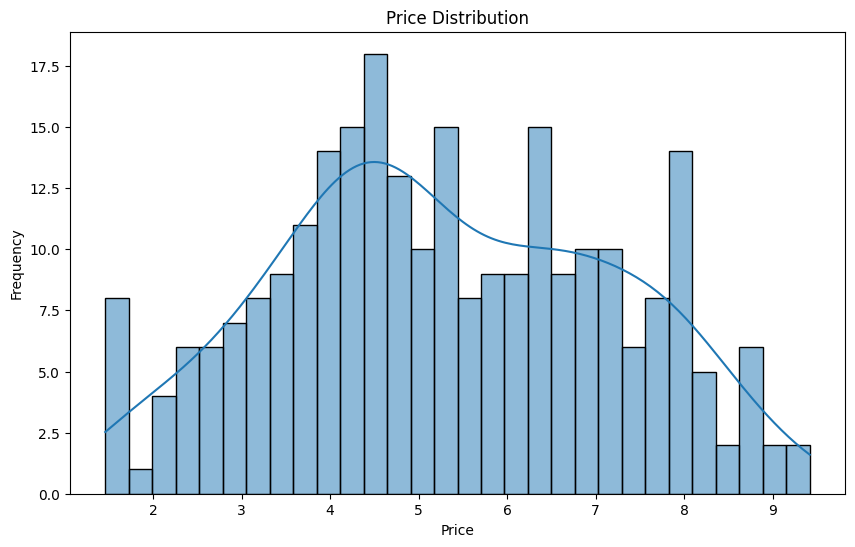

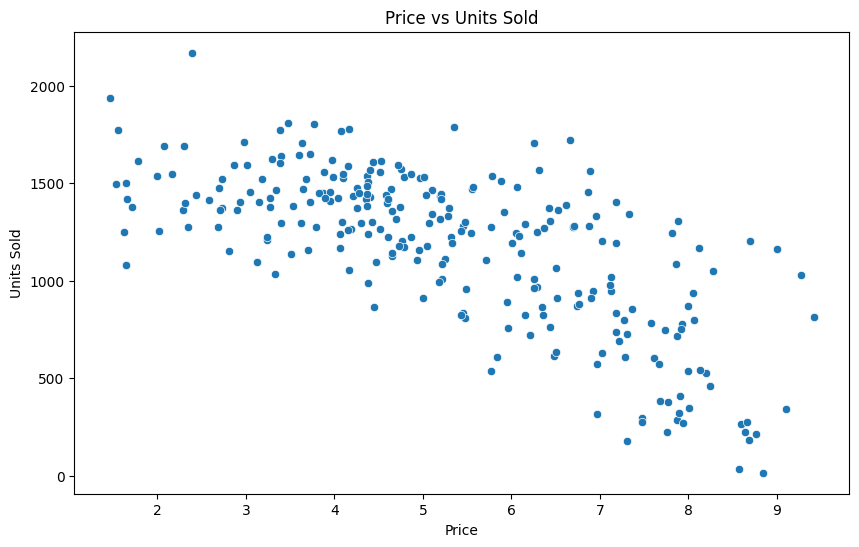

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(sales_data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='units', data=sales_data)
plt.title('Price vs Units Sold')
plt.xlabel('Price')
plt.ylabel('Units Sold')
plt.show()

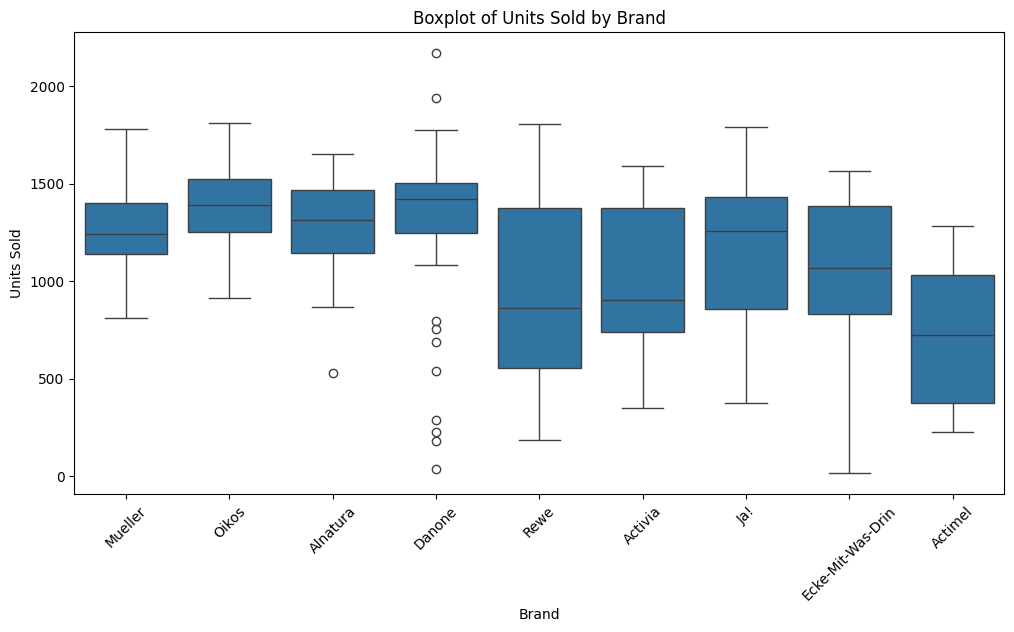

In [ ]:
merged_data = pd.merge(sales_data, product_data, on='product_id')

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='units', data=merged_data)
plt.title('Boxplot of Units Sold by Brand')
plt.xlabel('Brand')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()


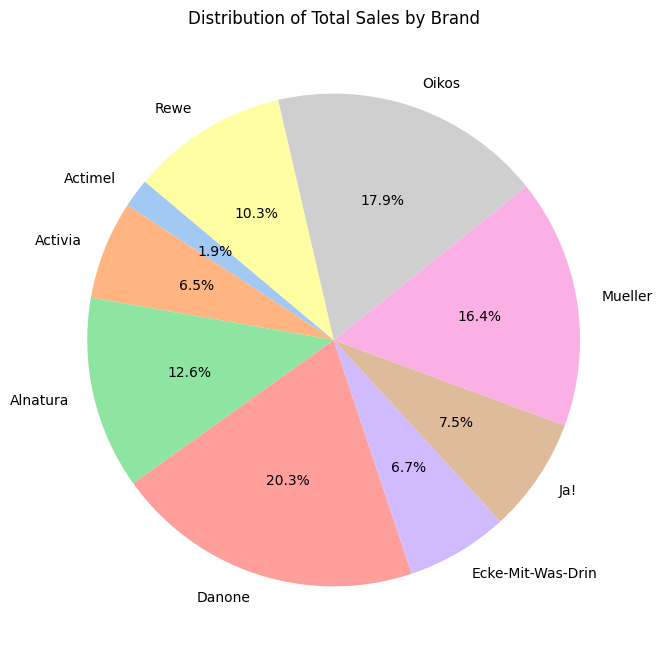

In [ ]:
brand_sales = merged_data.groupby('brand')['units'].sum()

plt.figure(figsize=(8, 8))
plt.pie(brand_sales, labels=brand_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Total Sales by Brand')
plt.show()


In [ ]:
import pandas as pd

product_data = pd.read_csv('/content/product.csv')
sales_data = pd.read_csv('/content/sales.csv')

merged_data = pd.merge(sales_data, product_data, on='product_id')

print(merged_data.head())


   Unnamed: 0_x        date  product_id  price   units  Unnamed: 0_y    brand  \
0             0  2020-01-01           0   4.65  1126.0             0  Mueller   
1             1  2020-01-02           0   4.76  1205.0             0  Mueller   
2             2  2020-01-03           0   5.22  1007.0             0  Mueller   
3             3  2020-01-04           0   5.45  1282.0             0  Mueller   
4             4  2020-01-05           0   3.33  1037.0             0  Mueller   

     flavour  volume_per_joghurt_g  packsize  
0  blueberry                   150         6  
1  blueberry                   150         6  
2  blueberry                   150         6  
3  blueberry                   150         6  
4  blueberry                   150         6  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X = merged_data[['price']]  # Feature: price
y = merged_data['units']    # Target: units sold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [ ]:
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")


Mean Absolute Error (MAE): 232.07030539707358


In [ ]:
baseline_pred = [y_train.mean()] * len(y_test)

baseline_mae = mean_absolute_error(y_test, baseline_pred)

print(f"Baseline MAE: {baseline_mae}")


Baseline MAE: 356.03846153846155
